# Case study: CPA-catalyzed nucleophilic addition to imines (*Nature* **2019**)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import warnings
from MT_utils import run_MT, get_sorted_neighbours, run_and_plot

import sys
sys.path.append('../../src/')
import RaRFRegressor
import utils

plt.rcParams['font.size'] = 14
COLORA = '#027F80'
COLORB = '#B2E5FC'

SEED = 314159


## RaRF Regression

In [2]:

df = pd.read_csv('../../data/Angew_2024.csv')



reactions = np.column_stack((df['ddG'].values,df.iloc[:, 6:]))


/tmp/ipykernel_8148/3145596315.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/Angew_2024.csv')


In [3]:
reactions

array([[-1.77856452,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.77856452,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.77856452,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-2.43121974,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-2.30681522,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-2.77698652,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [4]:
# Only include the DDG and the fingerprint bits in df.iloc[:,6:]
reduced_df = VarianceThreshold().fit_transform(reactions)

# before this, I really
df_train, df_test = train_test_split(reduced_df,train_size=0.8, random_state=25)

X_train = df_train[:,1:]
X_test = df_test[:,1:]
y_train = df_train[:,0]
y_test = df_test[:,0]

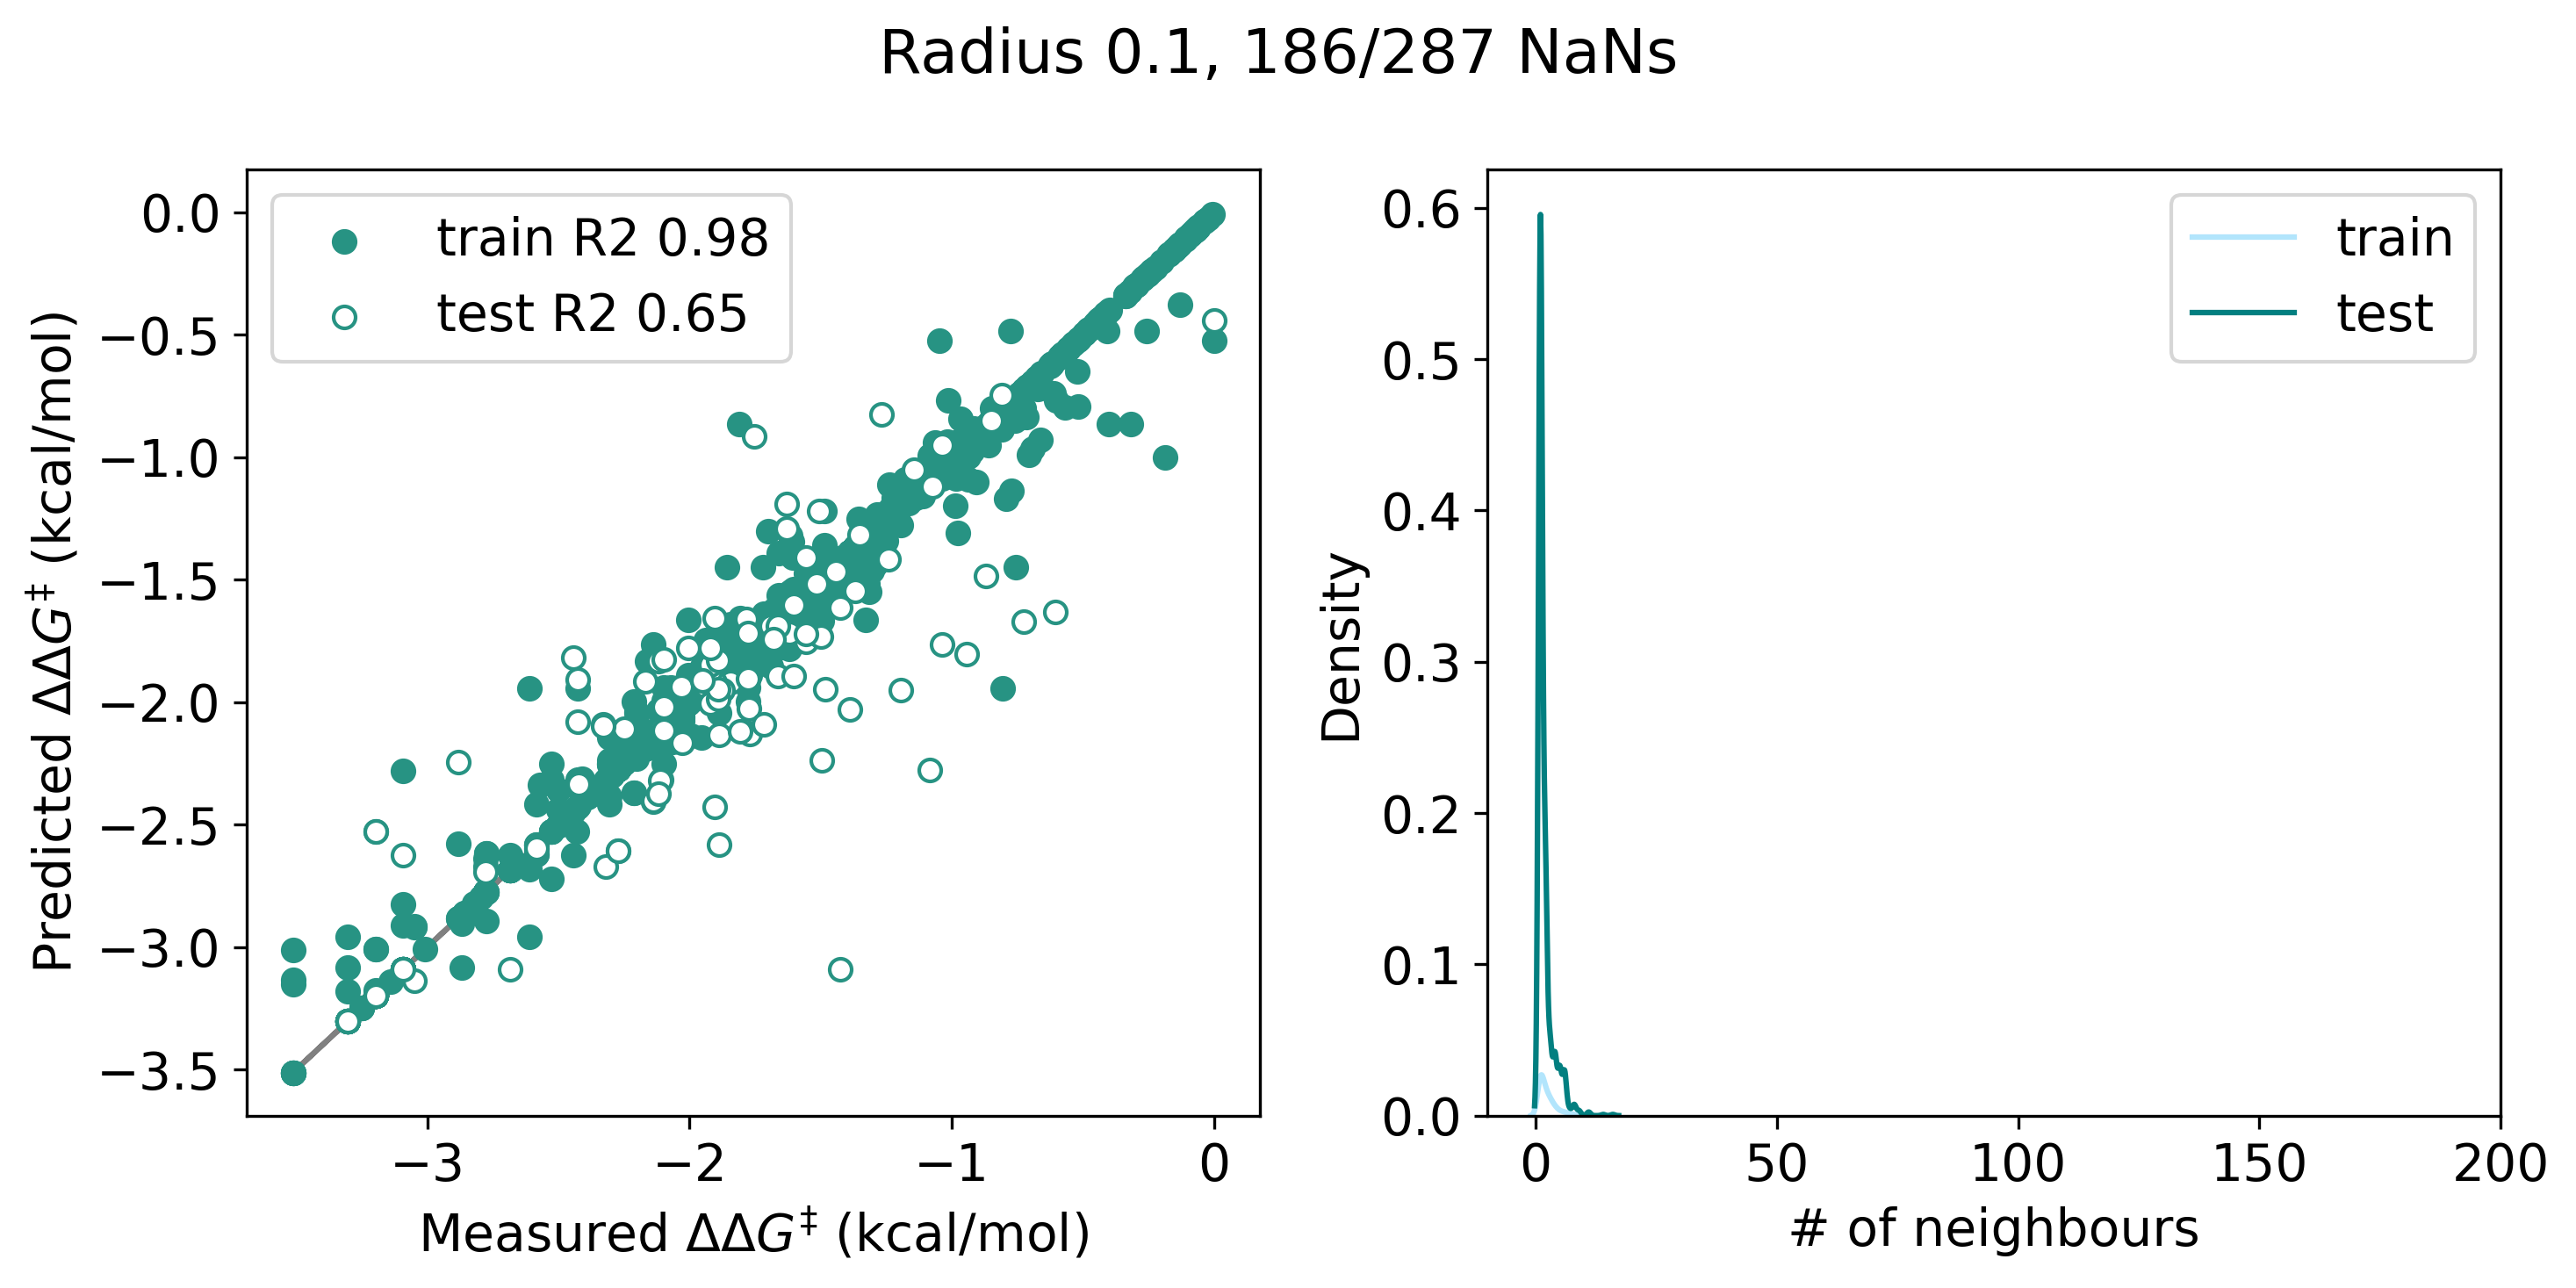

KeyboardInterrupt: 

In [5]:
distances = utils.get_distances(X_train,X_test)


# need X_train, y_train, X_test, y_test, distances
results = []

for radius in np.divide(range(1,10),10):
    results.append(run_and_plot(radius, X_train, y_train, X_test, y_test, distances))

RaRF_mae, nans, avg_neighbours, all_reactions, reaction_list, test_r2s = zip(*results)

"""
print(RaRF_mae)
print(nans)
print(avg_neighbours)
print(all_reactions)
print([len(ar) for ar in all_reactions])
print(reaction_list)
print(test_r2s)
"""

In [ ]:
# Wait. Why are those the same? Are they all the same reactions? They must be, right?
# Probably, Double check. Then, save some work.
# They are.
# Then, just do aquisitions.
# But the R2's are a little different. And so are the MAEs. I hope it's not some shenanigs.
# Okay, I need to set an sklearn seed.
# Look at random state. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
RaRF_mae

In [ ]:
num_reactions = [len(ar) for ar in all_reactions]

In [ ]:
# Reactions used starting from the 5th (0.6) radius onward are the same.
[all_reactions[i] == all_reactions[i + 1] for i in range(4, 8)]

In [ ]:
cutoffs = np.divide(range(1, 7), 10)

cutoffs

In [ ]:
i = 0
run_MT(cutoffs[i], num_reactions[i], RaRF_mae[i], test_r2s[i], X_train, y_train, X_test, y_test)

In [ ]:
i = 1
run_MT(cutoffs[i], num_reactions[i], RaRF_mae[i], test_r2s[i], X_train, y_train, X_test, y_test)
#sorted neighbours is a little slow. Look at that later.

In [ ]:
i = 2
run_MT(cutoffs[i], num_reactions[i], RaRF_mae[i], test_r2s[i], X_train, y_train, X_test, y_test)

In [ ]:
i = 3
run_MT(cutoffs[i], num_reactions[i], RaRF_mae[i], test_r2s[i], X_train, y_train, X_test, y_test)

In [ ]:
i = 4
run_MT(cutoffs[i], num_reactions[i], RaRF_mae[i], test_r2s[i], X_train, y_train, X_test, y_test)

In [ ]:
i = 5
run_MT(cutoffs[i], num_reactions[i], RaRF_mae[i], test_r2s[i], X_train, y_train, X_test, y_test)